In [1]:
import pandas as pd

In [2]:
!ls ..

archive  hydra-out  nbl       osteo	rhabdo	  synthetic
ewing	 local	    one-offs  overview	synovial


In [3]:
targets = {'Ewing sarcoma': '../ewing/data/TH-Ewing-Pathways-Enrichment.tsv',
            'MYCN-NA Neuroblastoma': '../nbl/mycn-na/data/TARGET-MYCN-NA-Pathways-Enrichment.tsv',
            'Osteosarcoma': '../osteo/treehouse/data/TH-Osteo-Pathways-Enrichment.tsv',
            'eRMS': '../rhabdo/data/TH-eRMS-Pathways-Enrichment.tsv',
            'aRMS': '../rhabdo/data/TH-aRMS-Pathways-Enrichment.tsv',
            'Synovial sarcoma': '../synovial/data/micro-58-synovial-Pathways-Enrichment.tsv'}

In [10]:
theme = {'Osteosarcoma (cluster 0)': 'Osteosarcoma (Regulation of Translation)',
         'Osteosarcoma (cluster 1)': 'Osteosarcoma (Wound Healing)',
         'Osteosarcoma (cluster 2)': 'Osteosarcoma (Innate Immune)',
         'Osteosarcoma (cluster 3)': 'Osteosarcoma (Complement/Humoral Immune)',
         'Ewing sarcoma (cluster 0)': 'Ewing sarcoma (Cell Cycle)',
         'Ewing sarcoma (cluster 1)': 'Ewing sarcoma (rRNA Processing)',
         'Ewing sarcoma (cluster 2)': 'Ewing sarcoma (Wound Healing)',
         'Ewing sarcoma (cluster 3)': 'Ewing sarcoma (Innate/Adaptive Immune)',
         'Ewing sarcoma (cluster 4)': 'Ewing sarcoma (Myogenesis)',
         'MYCN-NA Neuroblastoma (cluster 0)': 'MYCN-NA Neuroblastoma (Adaptive Immune)',
         'MYCN-NA Neuroblastoma (cluster 1)': 'MYCN-NA Neuroblastoma (Regulation of Translation)',
         'MYCN-NA Neuroblastoma (cluster 2)': 'MYCN-NA Neuroblastoma (Wound Healing)',
         'eRMS (cluster 0)': 'Embryonal Rhabdomyosarcoma (Regulation of Translation)',
         'eRMS (cluster 1)': 'Embryonal Rhabdomyosarcoma (Adaptive Immune)',
         'aRMS (cluster 0)': 'Alveolar Rhabdomyosarcoma (Epithelial)',
         'aRMS (cluster 1)': 'Alveolar Rhabdomyosarcoma (Adaptive Immune)',
         'aRMS (cluster 2)': 'Alveolar Rhabdomyosarcoma (mRNA Processing)',
         'Synovial sarcoma (cluster 0)': 'Synovial sarcoma (Regulation of Translation)',
         'Synovial sarcoma (cluster 1)': 'Synovial sarcoma (Innate Immune)',
         'Synovial sarcoma (cluster 2)': 'Synovial sarcoma (Neuronal)', 
         'Synovial sarcoma (cluster 3)': 'Synovial sarcoma (Cell Cycle)'}

In [11]:
sigs = set()

for disease, target in targets.items():
    df = pd.read_csv(target, sep='\t', index_col=[0], header=[0, 1])
    for cluster, t in df.groupby(level=0, axis=1):
        t = t[cluster]
        hits = t[(t['NES'] > 0) & (t['padj'] < 0.05)].sort_values('NES', ascending=False).head(10).index.values
        sigs.update(hits)

In [12]:
plot_df = pd.DataFrame(index=sigs)

for disease, target in targets.items():
    df = pd.read_csv(target, sep='\t', index_col=[0], header=[0, 1])
    for cluster, t in df.groupby(level=0, axis=1):
        tag = '%s (cluster %s)' % (disease, cluster)
        tag = theme[tag]
        for p in plot_df.index.values:
            try:
                padj = t[cluster].loc[p, 'padj']
                if padj < 0.05:
                    NES = t[cluster].loc[p, 'NES']
                
                else:
                    NES = 0.0
            
            except KeyError:
                NES = 0.0
                
            plot_df.loc[p, tag] = NES

In [13]:
plot_df

,Osteosarcoma (Regulation of Translation),Osteosarcoma (Wound Healing),Osteosarcoma (Innate Immune),Osteosarcoma (Complement/Humoral Immune),Alveolar Rhabdomyosarcoma (Epithelial),Alveolar Rhabdomyosarcoma (Adaptive Immune),Alveolar Rhabdomyosarcoma (mRNA Processing),MYCN-NA Neuroblastoma (Adaptive Immune),MYCN-NA Neuroblastoma (Regulation of Translation),MYCN-NA Neuroblastoma (Wound Healing),...,Ewing sarcoma (rRNA Processing),Ewing sarcoma (Wound Healing),Ewing sarcoma (Innate/Adaptive Immune),Ewing sarcoma (Myogenesis),Embryonal Rhabdomyosarcoma (Regulation of Translation),Embryonal Rhabdomyosarcoma (Adaptive Immune),Synovial sarcoma (Regulation of Translation),Synovial sarcoma (Innate Immune),Synovial sarcoma (Neuronal),Synovial sarcoma (Cell Cycle)
TYROBP CAUSAL NETWORK%WIKIPATHWAYS_20181110%WP3945%HOMO SAPIENS,-3.855868,3.934875,3.919982,0.000000,0.000000,3.929960,-3.499394,2.374835,-3.989755,4.165456,...,-4.306204,3.518102,5.140573,0.000000,-3.480968,3.496798,0.000000,4.307025,-2.099859,-3.849827
CELLULAR RESPONSE TO INTERFERON-GAMMA%GOBP%GO:0071346,-4.361385,3.595749,4.488971,2.329255,0.000000,3.942808,-3.919906,2.219586,-3.926299,4.683017,...,-3.739227,0.000000,5.308296,0.000000,-3.546265,3.554102,-1.940906,4.571965,0.000000,-3.825524
NCRNA METABOLIC PROCESS%GOBP%GO:0034660,3.159371,-1.716617,0.000000,0.000000,-2.476335,0.000000,2.253546,0.000000,3.202982,-2.858003,...,2.780582,0.000000,-2.069581,-3.322520,0.000000,0.000000,3.908216,-3.917927,-1.538431,0.000000
COLLAGEN FORMATION%REACTOME%R-HSA-1474290.1,0.000000,3.498582,-2.412981,-3.020594,0.000000,0.000000,0.000000,-3.032530,-2.531118,4.571972,...,-4.692830,3.446140,2.877075,1.816411,0.000000,0.000000,-3.037230,2.701906,0.000000,0.000000
INTERFERON-GAMMA-MEDIATED SIGNALING PATHWAY%GOBP%GO:0060333,-4.060432,3.347978,4.288670,2.286104,0.000000,3.398804,-3.333542,2.174214,-3.623178,4.408166,...,-3.140112,0.000000,4.921943,0.000000,-3.702110,3.716833,-2.230043,4.204367,0.000000,-3.472231
NON-MOTILE CILIUM ASSEMBLY%GOBP%GO:1905515,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.864633,...,0.000000,-2.269558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.389802,0.000000
CELL MORPHOGENESIS INVOLVED IN NEURON DIFFERENTIATION%GOBP%GO:0048667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.124750,0.000000,0.000000,2.094857,0.000000,0.000000,-2.938535,0.000000,2.440983,1.792754
REGULATION OF LEUKOCYTE ACTIVATION%GOBP%GO:0002694,-4.546909,0.000000,4.622758,2.277422,0.000000,4.432021,0.000000,2.829762,-4.325331,3.620823,...,-3.923565,1.906656,5.114887,0.000000,-3.300804,3.294730,-1.779747,4.376654,-2.513152,-3.285354
CHROMOSOME MAINTENANCE%REACTOME DATABASE ID RELEASE 66%73886,3.950873,-2.776162,0.000000,-3.859734,0.000000,0.000000,0.000000,2.834842,0.000000,-3.119106,...,0.000000,0.000000,-2.511196,-2.126676,0.000000,0.000000,3.565611,-3.693668,-2.263263,2.365564
ACTIVATION OF IMMUNE RESPONSE%GOBP%GO:0002253,-4.452747,0.000000,4.616696,2.100330,0.000000,4.045186,0.000000,2.378196,-3.983432,3.252237,...,-3.228801,0.000000,4.923894,0.000000,-3.650626,3.644959,-1.833006,4.242042,-1.970853,-2.845290


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

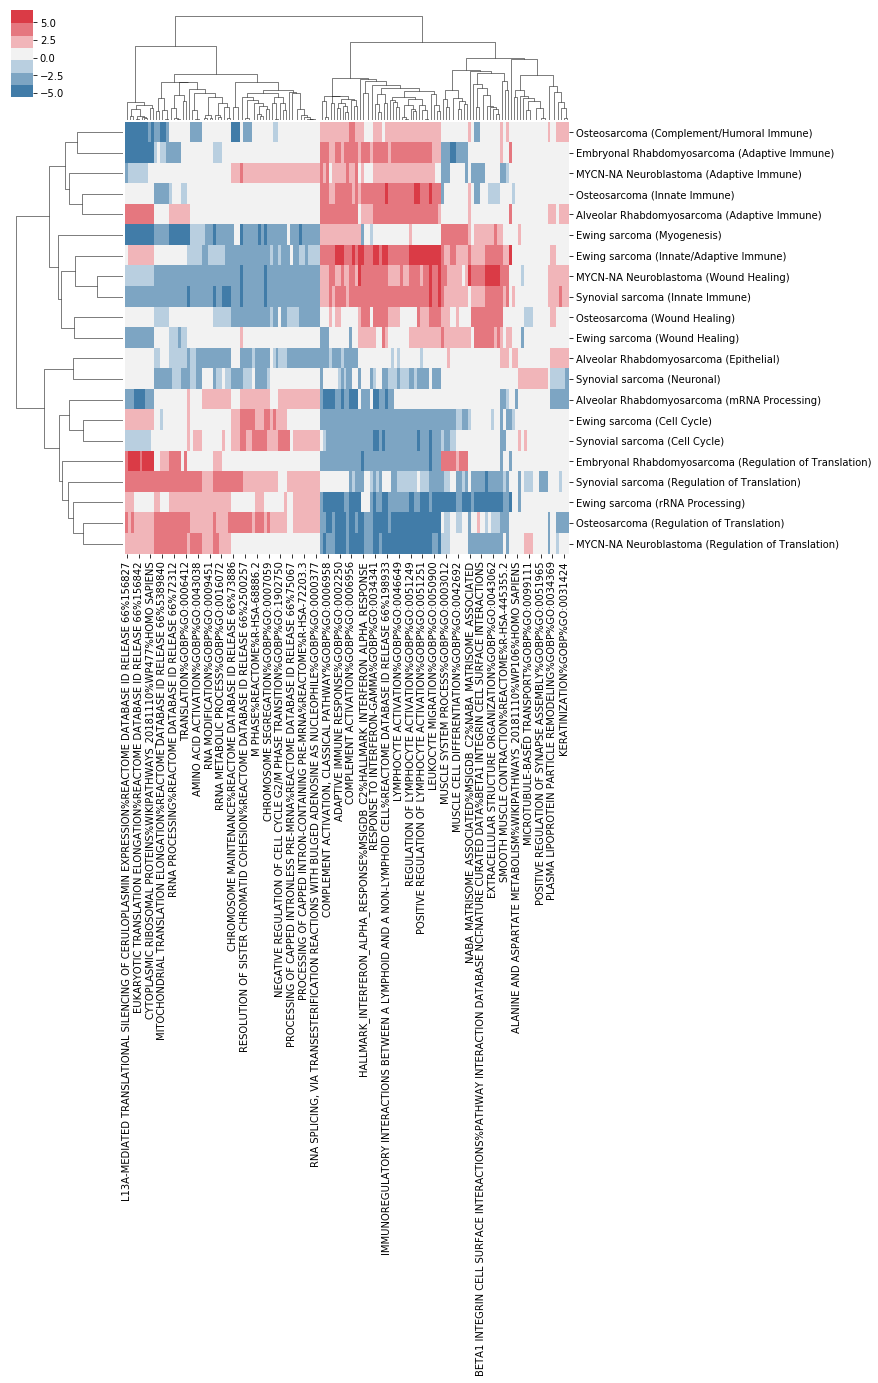

In [20]:
sns.clustermap(plot_df.T,
               cmap=sns.diverging_palette(240, 10, n=7))

pth = 'img/pan-cancer-NES-heatmap.svg'
plt.savefig(pth, format='svg', bbox_inches='tight')